In [1]:
import numpy as np
from toploader import load
import matplotlib.pyplot as plt

In [2]:
X_train, Y_train = load(cache_dir="/n/holyscratch01/iaifi_lab/rikab/top", dataset="train", num_data = 250000)
X_test, Y_test = load(cache_dir="/n/holyscratch01/iaifi_lab/rikab/top", dataset="test", num_data=5000)

In [3]:
def jet_mass(p):
    
    P = np.zeros((p.shape[0], 4))

    P[:,0] = np.sum(p[:,:,0] * np.cosh(p[:,:,1]),axis=1)
    P[:,1] = np.sum(p[:,:,0] * np.cos(p[:,:,2]),axis=1)
    P[:,2] = np.sum(p[:,:,0] * np.sin(p[:,:,2]),axis=1)
    P[:,3] = np.sum(p[:,:,0] * np.sinh(p[:,:,1]),axis=1)

    return np.nan_to_num(np.sqrt(P[:,0]**2 - np.sum(P[:,1:]**2, axis = 1)))


Text(0, 0.5, 'Density [GeV$^{-1}$]')

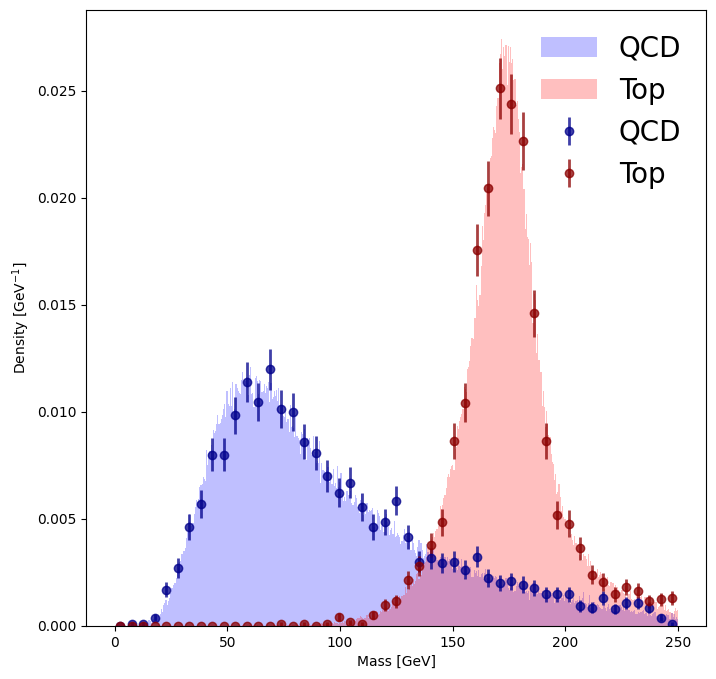

In [4]:

fig, axes = plt.subplots(figsize=(8,8))
plt.rcParams['font.size'] = '20'

qcd_masses_train = jet_mass(X_train[Y_train == 0])
top_masses_train = jet_mass(X_train[Y_train == 1])

qcd_masses_test = jet_mass(X_test[Y_test == 0])
top_masses_test = jet_mass(X_test[Y_test == 1])

# Histograms
bins = np.linspace(0, 250, 500)
plt.hist(qcd_masses_train, bins = bins, color = "blue", alpha = 0.25, label = "QCD", density = True)
plt.hist(top_masses_train, bins = bins, color = "red", alpha = 0.25, label = "Top", density = True)

# Scatterplots
bins = np.linspace(0, 250, 50)
def calc_hist(vals, weights=None, density=True):
    
    if weights is None:
        weights = np.ones(vals.shape)
    
    # compute histogram
    hist, bins_ = np.histogram(vals, bins=bins, weights=weights)
    errs2 = np.histogram(vals, bins=bins, weights=weights*weights)[0]

    # handle normalization
    if density:
        hist_tot = np.sum(hist * np.diff(bins_))
        hist /= hist_tot
        errs2 /= hist_tot*hist_tot

    midbins = (bins_[1:] + bins_[:-1])/2
    return midbins, hist, np.sqrt(errs2)


plt.errorbar(*calc_hist(qcd_masses_test), color = "darkblue", alpha = 0.75, label = "QCD", lw = 2, fmt = "o")
plt.errorbar(*calc_hist(top_masses_test), color = "darkred", alpha = 0.75, label = "Top",  lw =2, fmt = "o")
plt.legend(frameon = False)
plt.xlabel("Mass [GeV]")
plt.ylabel("Density [GeV$^{-1}$]")